In [1]:
# If you're in Google Colab, uncomment and run:
# !pip install pandas numpy matplotlib seaborn scikit-learn xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('archive1/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#Create Car_Age column 
df['Car_Age'] = 2025 - df['Year']

# Drop unnecessary columns
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)

# Convert categorical variables to numerical
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
   Selling_Price  Present_Price  Kms_Driven  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11             False   
1           4.75           9.54       43000      0       12              True   
2           7.25           9.85        6900      0        8             False   
3           2.85           4.15        5200      0       14             False   
4           4.60           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  


In [7]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Train-test split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Show shape of the split data
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (240, 8)
Test set shape: (61, 8)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train both models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)


In [11]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n{name} Performance:")
    print("R² Score:", round(r2, 3))
    print("RMSE:", round(rmse, 3))

# Evaluate both models
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest Regressor")



Linear Regression Performance:
R² Score: 0.849
RMSE: 1.865

Random Forest Regressor Performance:
R² Score: 0.96
RMSE: 0.96


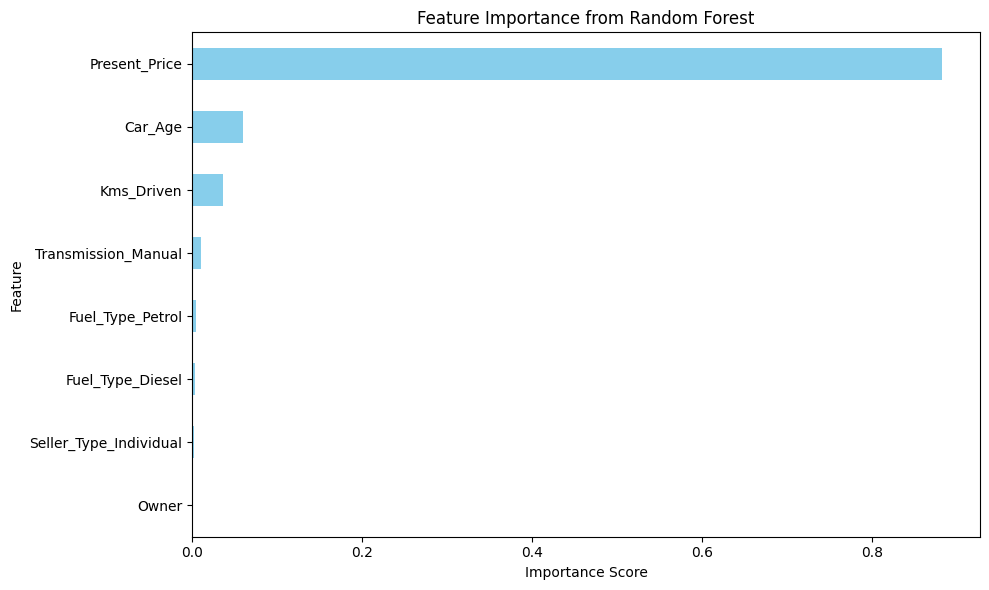

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a Series of feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and plot
importances.sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize base model
rf_base = RandomForestRegressor(random_state=42)

# Setup GridSearch
grid_search = GridSearchCV(estimator=rf_base,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
best_preds = best_rf.predict(X_test)

# Use the same evaluate_model function
evaluate_model(y_test, best_preds, "Optimized Random Forest")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Optimized Random Forest Performance:
R² Score: 0.96
RMSE: 0.957
